In [2]:
import biblio_modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Import de la table exporté en utilisant les date comme index (+ drop de l'ancien index)
df_processed = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=";").drop(columns='drop')
df_processed

,id_prod,Timestamp,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,8.99,0


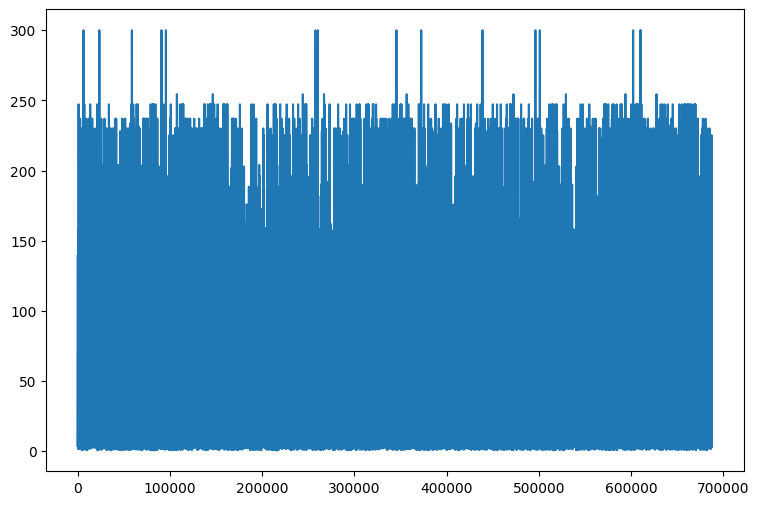

In [5]:
df_processed['price'].plot(figsize=(9,6))
plt.show()